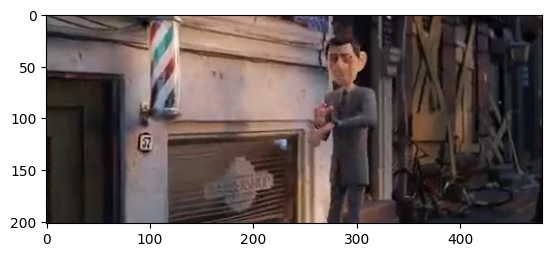

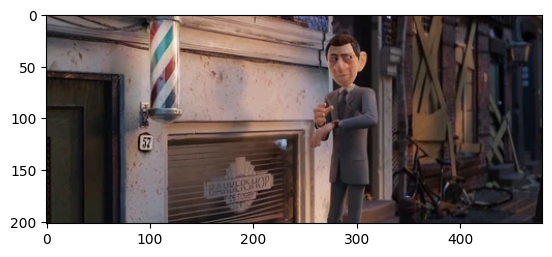

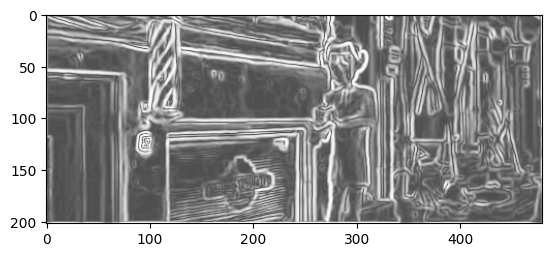

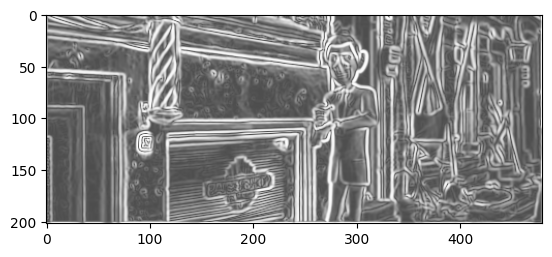

Loss value: 0.054781217128038406
Mask shape: torch.Size([1, 3, 202, 480])


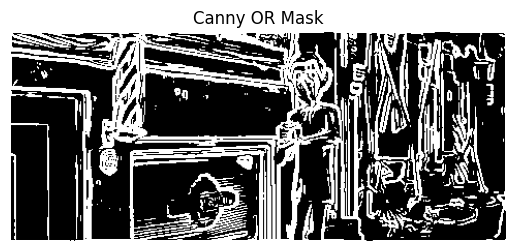

In [1]:
from CannyEdgeDetectorModel import DifferentiableCanny
from CannyEdgeLoss import CannyEdgeLoss

In [5]:
import torch
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from PIL import Image
import torchvision.transforms as T

# --- Image loader ---
def load_image(path, size):
    img = Image.open(path).convert("RGB")
    transform = T.Compose([
        T.Resize(size),
        T.ToTensor(),  # [C,H,W] float32 in [0,1]
    ])
    return transform(img).unsqueeze(0)  # [1,3,H,W]

# --- Interactive visualization ---
def visualize_edges(low_threshold=0.1, high_threshold=0.3, mask_threshold=0.7):
    # Load your images
    img1 = load_image('./frame_00256l.webp', size=(202,480))
    img2 = load_image('./frame_00256h.webp', size=(202,480))

    # Instantiate Canny
    canny = DifferentiableCanny(
        kernel_size=5,
        sigma=1.0,
        low_threshold=low_threshold,
        high_threshold=high_threshold
    )

    # Compute edges
    edges1 = canny(img1)
    edges2 = canny(img2)

    # Mask (OR between both edge maps, thresholded)
    mask = ((edges1 > mask_threshold) | (edges2 > mask_threshold)).float()

    # Convert to numpy for visualization
    img1_np = edges1[0].permute(1,2,0).cpu().numpy()
    img2_np = edges2[0].permute(1,2,0).cpu().numpy()
    mask_np = mask[0,0].cpu().numpy()

    # Plot side by side
    fig, axs = plt.subplots(1,3, figsize=(15,5))
    axs[0].imshow(img1_np)
    axs[0].set_title("Image 1")
    axs[0].axis("off")

    axs[1].imshow(img2_np)
    axs[1].set_title("Image 2")
    axs[1].axis("off")

    axs[2].imshow(mask_np, cmap="gray")
    axs[2].set_title(f"Mask (low={low_threshold:.2f}, high={high_threshold:.2f}, mask={mask_threshold:.2f})")
    axs[2].axis("off")

    plt.show()

# --- Create sliders ---
interact(
    visualize_edges,
    low_threshold=FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01),
    high_threshold=FloatSlider(value=0.3, min=0.0, max=1.0, step=0.01),
    mask_threshold=FloatSlider(value=0.7, min=0.0, max=1.0, step=0.01)
)

interactive(children=(FloatSlider(value=0.1, description='low_threshold', max=1.0, step=0.01), FloatSlider(val…

<function __main__.visualize_edges(low_threshold=0.1, high_threshold=0.3, mask_threshold=0.7)>